In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from inference.inference import unmix
from experiments.load import load_trained_model

l_dim = 128
i_dim = 256
dataset = "fashion"

data, cvae, predictor = load_trained_model(
    encoder_path=f"../../trained_models/encoders_fashion/en_int_{i_dim}_lat_{l_dim}_{dataset}.keras",
    decoder_path=f"../../trained_models/decoders_fashion/de_int_{i_dim}_lat_{l_dim}_{dataset}.keras",
    predictor_path=f"../../trained_models/predictores/CCE_Conv2D_{dataset}.keras",
    dataset=f"{dataset}")

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]


def objective(trial):
    
    bias = trial.suggest_float("bias", 0.1, 5.0)
    slope = trial.suggest_float("slope", 10.0, 60.0)

    try:
        metrics = unmix(
            x_train[:1000],
            x_train_1[:1000],
            y_train[:1000],
            y_train_1[:1000],
            cvae,
            predictor,
            bias=bias,
            slope=slope,
            Iterations=3,
        )

        return metrics["bpsnr"][0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        return float("inf")
    
print(cvae)
print(cvae.encoder)
print(cvae.decoder)
print(cvae.original_dim)
print(cvae.beta)

Usando fashion como dataset
<CVAE name=cvae_8, built=False>
<Functional name=encoder, built=True>
<Functional name=decoder, built=True>
784
1


In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop 
l_dim = 128
i_dim = 256
dataset = "fashion"

cvae = load.cvae(inter=128,lat=64,dataset="fashion")
data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]


def objective(trial):

    bias = trial.suggest_float("bias", 0.1, 5.0)
    slope = trial.suggest_float("slope", 5.0, 25.0)
    try:
    
        c = crop(cvae=cvae,predictor=predictor,data=dataset,bias=bias,slope=slope)
        metrics = c.unmix(
            x_train[:100],
            x_train_1[:100],
            y_train[:100],
            y_train_1[:100],
            Iterations=3,
        )

        return metrics["bpsnr"][0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        return float("inf")
    

Usando fashion como dataset


In [7]:
import optuna

# Creamos un estudio de minimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Probamos 30 combinaciones

# Mostramos los mejores resultados
print("\n📊 Mejores hiperparámetros encontrados:")
print(study.best_params)
print("🔽 Mejor bpsnr_mean:", study.best_value)

[I 2025-08-23 21:07:42,756] A new study created in memory with name: no-name-a5fd6181-bf11-48b7-bce8-3b3703d64461
[I 2025-08-23 21:07:47,839] Trial 0 finished with value: 7.662392616271973 and parameters: {'bias': 4.651204246127124, 'slope': 6.836000480459599}. Best is trial 0 with value: 7.662392616271973.
[I 2025-08-23 21:07:52,740] Trial 1 finished with value: 7.662317276000977 and parameters: {'bias': 3.068683523637862, 'slope': 15.263517865078223}. Best is trial 0 with value: 7.662392616271973.
[I 2025-08-23 21:07:57,560] Trial 2 finished with value: 7.662317276000977 and parameters: {'bias': 4.894806691190206, 'slope': 24.21348301367577}. Best is trial 0 with value: 7.662392616271973.
[I 2025-08-23 21:08:02,376] Trial 3 finished with value: 14.056199073791504 and parameters: {'bias': 0.9313081753006526, 'slope': 23.164515173711624}. Best is trial 3 with value: 14.056199073791504.
[I 2025-08-23 21:08:07,203] Trial 4 finished with value: 7.662317276000977 and parameters: {'bias': 2


📊 Mejores hiperparámetros encontrados:
{'bias': 0.18495822150909808, 'slope': 18.248678323921897}
🔽 Mejor bpsnr_mean: 18.307270050048828


In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from inference.inference import unmix
from experiments import load
from CROP_models.crop import crop

crops = []
inter = [128,128, 256, 256 ,512 ,1024]
lat =   [2,  64 , 64 , 128 ,128 ,256]
dataset = "fashion"


for i, l in zip(inter,lat):
    crops.append(crop(load.cvae(lat=l,inter=i,dataset=dataset),predictor=predictor,data=dataset))



data = load.data(dataset=dataset)
predictor  =load.predictor(dataset=dataset)



x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]


def objective(trial):
    bias = trial.suggest_float("bias", 0.1, 5.0)
    slope = trial.suggest_float("slope", 10.0, 60.0)

    try:
        metrics = crop.unmix(
            x_train[:1000],
            x_train_1[:1000],
            y_train[:1000],
            y_train_1[:1000],
            cvae,
            predictor,
            bias=bias,
            slope=slope,
            Iterations=3,
        )

        return metrics["bpsnr"][0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        return float("inf")
    
print(cvae)
print(cvae.encoder)
print(cvae.decoder)
print(cvae.original_dim)
print(cvae.beta)


import optuna

# Creamos un estudio de minimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)  # Probamos 30 combinaciones

# Mostramos los mejores resultados
print("\n📊 Mejores hiperparámetros encontrados:")
print(study.best_params)
print("🔽 Mejor bpsnr_mean:", study.best_value)

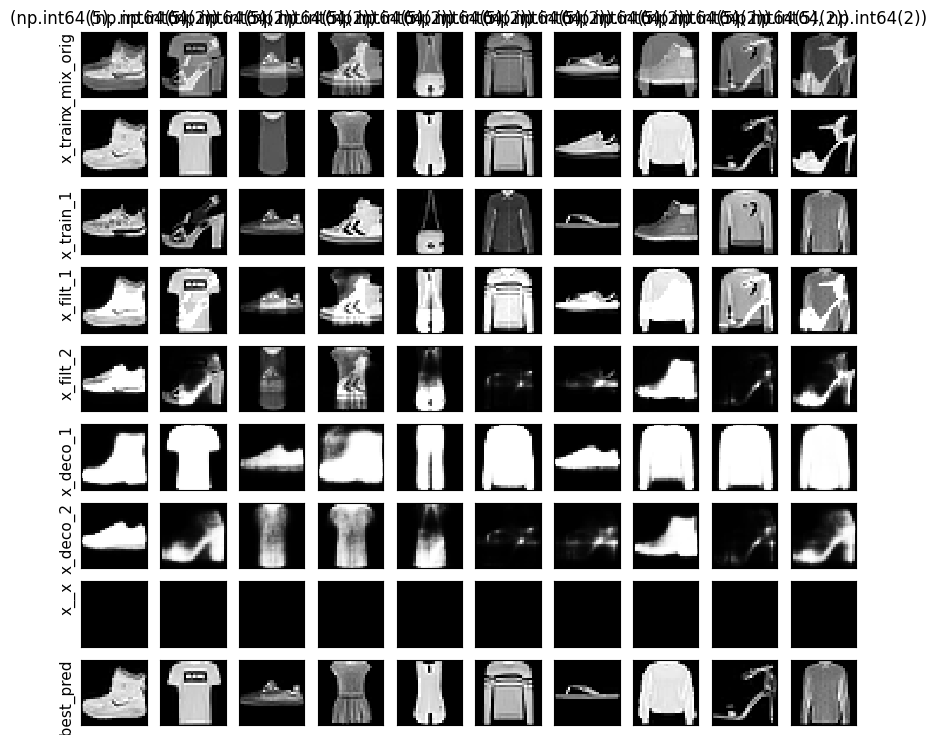

((<tf.Tensor: shape=(), dtype=float32, numpy=15.971989631652832>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.8320190906524658>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=11.581478118896484>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.3360804319381714>),
 array([[2.6637650e-07, 2.9789071e-08, 8.4511174e-07, 3.2432351e-07,
         2.8462593e-05, 5.9812353e-04, 4.1467763e-05, 3.0834323e-03,
         1.9117915e-04, 9.9605584e-01],
        [9.9708366e-01, 4.0872135e-07, 2.1530248e-03, 1.4585820e-04,
         6.7398008e-07, 3.7698392e-10, 5.6945306e-04, 7.7144698e-08,
         4.6657155e-05, 5.5545531e-08],
        [1.7270341e-04, 1.7047793e-04, 4.4488008e-03, 8.6087724e-03,
         1.9192425e-04, 9.5013564e-04, 8.8355998e-03, 9.7601360e-01,
         1.1062467e-04, 4.9750443e-04],
        [3.4230159e-04, 1.1618603e-04, 1.8656489e-03, 3.4886817e-03,
         3.5416724e-05, 4.1483878e-04, 4.6092147e-01, 1.5419208e-01,
         2.1509058e-03, 3.7647256e-01],
        [1.1490942e-01

In [ ]:
unmix(
    x_train[:10],
    x_train_1[:10],
    y_train[:10],
    y_train_1[:10],
    cvae,
    predictor,
    Iterations=3,
    show_graph=True,
)

Mejores hiperparámetros encontrados:
{'bias': 0.17606394529470876, 'slope': 48.53491166650604}


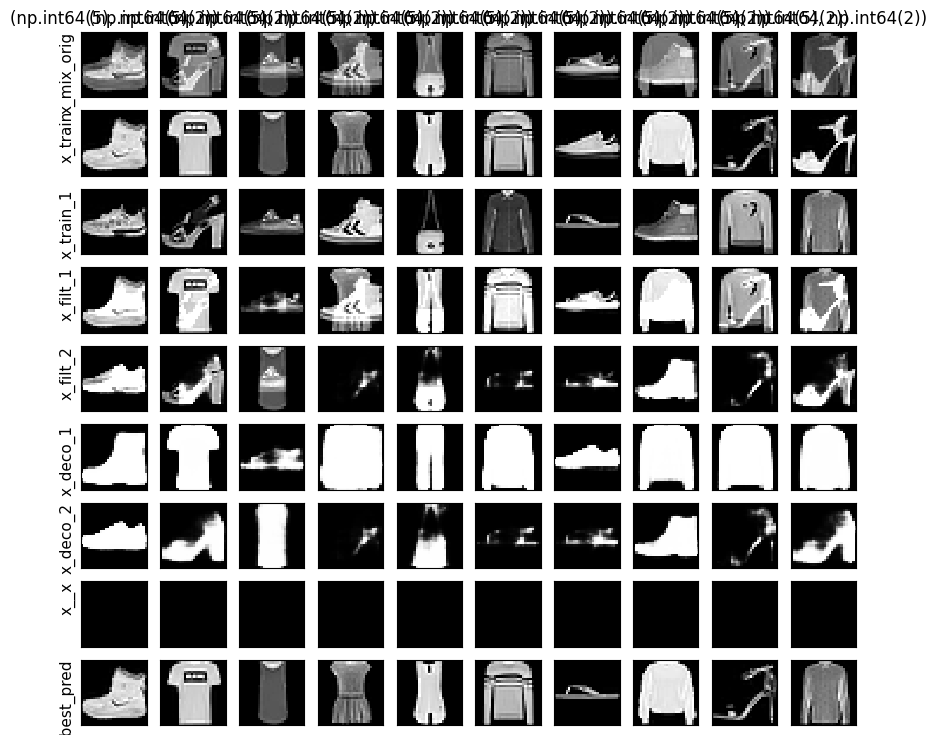

((<tf.Tensor: shape=(), dtype=float32, numpy=14.763890266418457>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.1299800872802734>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=10.076642036437988>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.7941288948059082>),
 array([[3.0635942e-07, 2.2630010e-08, 5.4874999e-07, 1.2771643e-07,
         1.4300426e-05, 6.7529053e-04, 3.6354868e-05, 1.6729364e-03,
         1.7190741e-04, 9.9742812e-01],
        [9.9548829e-01, 1.7986379e-06, 3.1670993e-03, 9.0336171e-04,
         6.0944961e-07, 1.7807381e-09, 4.2714048e-04, 1.3709669e-07,
         1.1670017e-05, 1.3526208e-08],
        [6.9973626e-06, 4.3617747e-06, 5.6259934e-04, 1.7247072e-05,
         6.0703907e-05, 7.1002561e-01, 1.0805523e-04, 2.8680927e-01,
         9.8715059e-04, 1.4179617e-03],
        [1.0091259e-02, 1.9112133e-03, 3.2592244e-03, 4.5956414e-02,
         9.7435011e-05, 1.0156104e-04, 6.4863950e-01, 3.9716758e-02,
         2.5464657e-03, 2.4768019e-01],
        [5.8470652e-02

In [ ]:
num_images = 10
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
# study.best_value


unmix(
    x_train[:10],
    x_train_1[:10],
    y_train[:10],
    y_train_1[:10],
    cvae,
    predictor,
    bias=study.best_params["bias"],
    slope=study.best_params["slope"],
    Iterations=3,
    show_graph=True,
)

Hay una mejora en la reconstrucción de las prendas, hay mayor stauración de las máscaras y mayor definición (por ejemplo las mangas de los buzos de las últimas imágenes). Hay una (duplicación? repetición?) de partes superpuesta ver taco de la última imágen.



### Prueba para mnist

Usando mnist como dataset


[I 2025-08-09 17:42:56,119] A new study created in memory with name: no-name-9440567a-cd9b-4d7d-bbb7-7db4c63b78a2
[I 2025-08-09 17:42:59,472] Trial 0 finished with value: inf and parameters: {'bias': 2.298121652663826, 'slope': 28.993000652315057}. Best is trial 0 with value: inf.


Error con bias=2.298121652663826, slope=28.993000652315057: too many values to unpack (expected 3)


[I 2025-08-09 17:43:03,051] Trial 1 finished with value: inf and parameters: {'bias': 1.2162981603292924, 'slope': 15.6202900143197}. Best is trial 0 with value: inf.


Error con bias=1.2162981603292924, slope=15.6202900143197: too many values to unpack (expected 3)


[I 2025-08-09 17:43:06,462] Trial 2 finished with value: inf and parameters: {'bias': 4.473224576990268, 'slope': 12.00759914657267}. Best is trial 0 with value: inf.


Error con bias=4.473224576990268, slope=12.00759914657267: too many values to unpack (expected 3)


[I 2025-08-09 17:43:10,426] Trial 3 finished with value: inf and parameters: {'bias': 2.717960058995749, 'slope': 47.671110091535375}. Best is trial 0 with value: inf.


Error con bias=2.717960058995749, slope=47.671110091535375: too many values to unpack (expected 3)


[I 2025-08-09 17:43:14,283] Trial 4 finished with value: inf and parameters: {'bias': 2.4816945535981785, 'slope': 16.078433220784795}. Best is trial 0 with value: inf.


Error con bias=2.4816945535981785, slope=16.078433220784795: too many values to unpack (expected 3)


[I 2025-08-09 17:43:17,978] Trial 5 finished with value: inf and parameters: {'bias': 1.457825172806845, 'slope': 34.65108642234918}. Best is trial 0 with value: inf.


Error con bias=1.457825172806845, slope=34.65108642234918: too many values to unpack (expected 3)


[I 2025-08-09 17:43:21,998] Trial 6 finished with value: inf and parameters: {'bias': 3.5025649840042425, 'slope': 48.00176409477098}. Best is trial 0 with value: inf.


Error con bias=3.5025649840042425, slope=48.00176409477098: too many values to unpack (expected 3)


[I 2025-08-09 17:43:25,832] Trial 7 finished with value: inf and parameters: {'bias': 4.697773886384216, 'slope': 42.75034266299245}. Best is trial 0 with value: inf.


Error con bias=4.697773886384216, slope=42.75034266299245: too many values to unpack (expected 3)


[I 2025-08-09 17:43:29,238] Trial 8 finished with value: inf and parameters: {'bias': 0.699846515489044, 'slope': 58.92699070903604}. Best is trial 0 with value: inf.


Error con bias=0.699846515489044, slope=58.92699070903604: too many values to unpack (expected 3)


[I 2025-08-09 17:43:32,951] Trial 9 finished with value: inf and parameters: {'bias': 4.904225768271897, 'slope': 26.585486879702525}. Best is trial 0 with value: inf.


Error con bias=4.904225768271897, slope=26.585486879702525: too many values to unpack (expected 3)


[I 2025-08-09 17:43:37,140] Trial 10 finished with value: inf and parameters: {'bias': 2.259603528355549, 'slope': 24.645354521841465}. Best is trial 0 with value: inf.


Error con bias=2.259603528355549, slope=24.645354521841465: too many values to unpack (expected 3)


[I 2025-08-09 17:43:40,759] Trial 11 finished with value: inf and parameters: {'bias': 0.11676576572871467, 'slope': 20.512269452288233}. Best is trial 0 with value: inf.


Error con bias=0.11676576572871467, slope=20.512269452288233: too many values to unpack (expected 3)


[I 2025-08-09 17:43:44,939] Trial 12 finished with value: inf and parameters: {'bias': 1.466931323511321, 'slope': 32.7967707212123}. Best is trial 0 with value: inf.


Error con bias=1.466931323511321, slope=32.7967707212123: too many values to unpack (expected 3)


[I 2025-08-09 17:43:48,731] Trial 13 finished with value: inf and parameters: {'bias': 1.684451709046527, 'slope': 10.464252352153874}. Best is trial 0 with value: inf.


Error con bias=1.684451709046527, slope=10.464252352153874: too many values to unpack (expected 3)


[I 2025-08-09 17:43:52,577] Trial 14 finished with value: inf and parameters: {'bias': 3.410255068143062, 'slope': 28.03100070425726}. Best is trial 0 with value: inf.


Error con bias=3.410255068143062, slope=28.03100070425726: too many values to unpack (expected 3)


[I 2025-08-09 17:43:56,251] Trial 15 finished with value: inf and parameters: {'bias': 0.7883348386562354, 'slope': 19.37610528071282}. Best is trial 0 with value: inf.


Error con bias=0.7883348386562354, slope=19.37610528071282: too many values to unpack (expected 3)


[I 2025-08-09 17:43:59,782] Trial 16 finished with value: inf and parameters: {'bias': 3.203492077863613, 'slope': 38.01345241021323}. Best is trial 0 with value: inf.


Error con bias=3.203492077863613, slope=38.01345241021323: too many values to unpack (expected 3)


[I 2025-08-09 17:44:03,586] Trial 17 finished with value: inf and parameters: {'bias': 1.9466465885211435, 'slope': 17.4039690878292}. Best is trial 0 with value: inf.


Error con bias=1.9466465885211435, slope=17.4039690878292: too many values to unpack (expected 3)


[I 2025-08-09 17:44:07,455] Trial 18 finished with value: inf and parameters: {'bias': 0.7252873683726939, 'slope': 28.58909333226822}. Best is trial 0 with value: inf.


Error con bias=0.7252873683726939, slope=28.58909333226822: too many values to unpack (expected 3)


[I 2025-08-09 17:44:11,327] Trial 19 finished with value: inf and parameters: {'bias': 4.016058247319051, 'slope': 22.884635087937912}. Best is trial 0 with value: inf.


Error con bias=4.016058247319051, slope=22.884635087937912: too many values to unpack (expected 3)


[I 2025-08-09 17:44:15,845] Trial 20 finished with value: inf and parameters: {'bias': 1.08583951670606, 'slope': 14.505264724754156}. Best is trial 0 with value: inf.


Error con bias=1.08583951670606, slope=14.505264724754156: too many values to unpack (expected 3)


[I 2025-08-09 17:44:19,295] Trial 21 finished with value: inf and parameters: {'bias': 4.198506845554841, 'slope': 11.379029825167486}. Best is trial 0 with value: inf.


Error con bias=4.198506845554841, slope=11.379029825167486: too many values to unpack (expected 3)


[I 2025-08-09 17:44:22,957] Trial 22 finished with value: inf and parameters: {'bias': 2.101707057965135, 'slope': 10.094784174795699}. Best is trial 0 with value: inf.


Error con bias=2.101707057965135, slope=10.094784174795699: too many values to unpack (expected 3)


[I 2025-08-09 17:44:26,939] Trial 23 finished with value: inf and parameters: {'bias': 2.8004988386821044, 'slope': 16.137548649883005}. Best is trial 0 with value: inf.


Error con bias=2.8004988386821044, slope=16.137548649883005: too many values to unpack (expected 3)


[I 2025-08-09 17:44:30,191] Trial 24 finished with value: inf and parameters: {'bias': 0.11971955504979181, 'slope': 21.582926049346256}. Best is trial 0 with value: inf.


Error con bias=0.11971955504979181, slope=21.582926049346256: too many values to unpack (expected 3)


[I 2025-08-09 17:44:34,092] Trial 25 finished with value: inf and parameters: {'bias': 2.968345985738315, 'slope': 32.392196486128924}. Best is trial 0 with value: inf.


Error con bias=2.968345985738315, slope=32.392196486128924: too many values to unpack (expected 3)


[I 2025-08-09 17:44:37,652] Trial 26 finished with value: inf and parameters: {'bias': 3.845677384265463, 'slope': 14.41435214102471}. Best is trial 0 with value: inf.


Error con bias=3.845677384265463, slope=14.41435214102471: too many values to unpack (expected 3)


[I 2025-08-09 17:44:41,361] Trial 27 finished with value: inf and parameters: {'bias': 4.468170440500288, 'slope': 29.881941411772722}. Best is trial 0 with value: inf.


Error con bias=4.468170440500288, slope=29.881941411772722: too many values to unpack (expected 3)


[I 2025-08-09 17:44:45,028] Trial 28 finished with value: inf and parameters: {'bias': 1.115317926834462, 'slope': 39.359941564674614}. Best is trial 0 with value: inf.


Error con bias=1.115317926834462, slope=39.359941564674614: too many values to unpack (expected 3)


[I 2025-08-09 17:44:49,011] Trial 29 finished with value: inf and parameters: {'bias': 2.5861990115026217, 'slope': 44.95743685179317}. Best is trial 0 with value: inf.


Error con bias=2.5861990115026217, slope=44.95743685179317: too many values to unpack (expected 3)


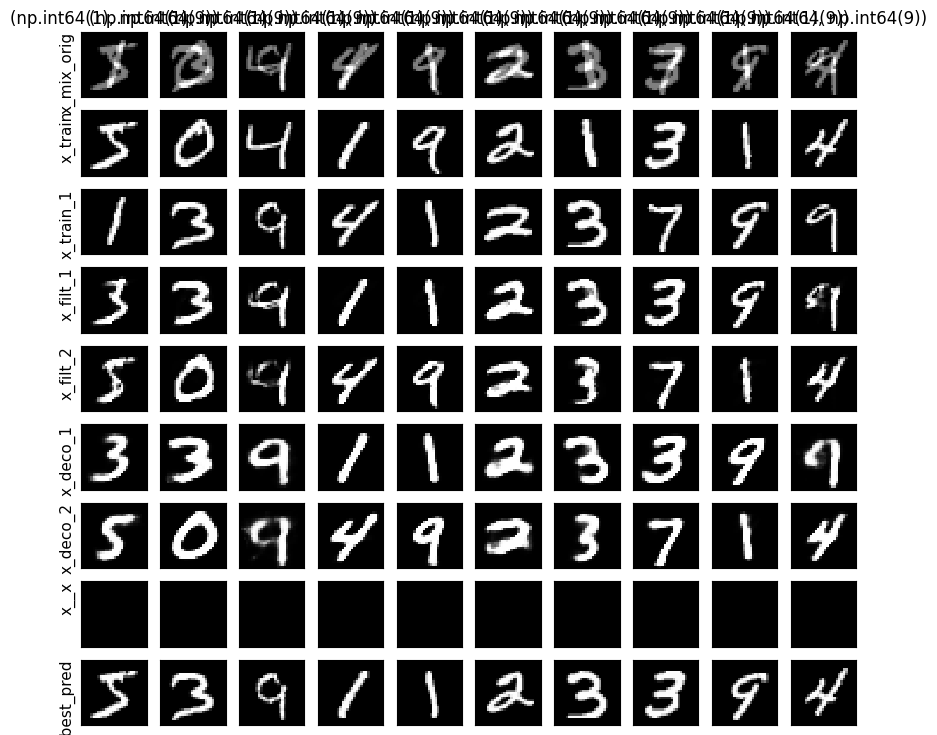


📊 Mejores hiperparámetros encontrados:
{'bias': 2.298121652663826, 'slope': 28.993000652315057}
🔽 Mejor bpsnr_mean: inf


In [ ]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from keras.models import load_model

from custom_layers.Sampling import Sampling
from custom_layers.ReshapeLayer import ReshapeLayer

from data.get_data import get_mnist_data
from models_definitions.cvae import CVAE
from inferencias.inferencia import unmix


data = get_mnist_data()

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  


encoder = load_model(
    "../../modelos_entrenados/encoders/en_int_256_lat_128_mnist.keras",
    custom_objects={"Sampling": Sampling},
)

decoder = load_model(
    "../../modelos_entrenados/decoders/de_int_256_lat_128_mnist.keras"
)

cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)

predictor = load_model(
    "../../modelos_entrenados/predictores/CCE_Conv2D.keras",
    {"ReshapeLayer": ReshapeLayer},
)


def objective(trial):
    bias = trial.suggest_float("bias", 0.1, 5.0)
    slope = trial.suggest_float("slope", 10.0, 60.0)

    # print(f"Probando bias={bias}, slope={slope}")

    try:
        bpsnr, bpsnr_d, _ = unmix(
            x_train[:1000],
            x_train_1[:1000],
            y_train[:1000],
            y_train_1[:1000],
            cvae,
            predictor,
            bias=bias,
            slope=slope,
            Iterations=3,
        )
        # print(f"Resultado OK: bpsnr = mean: {bpsnr[0]} std: {bpsnr[1]}\n")
        # print(f"Resultado OK: bpsnr = mean: {bpsnr_d[0]} std: {bpsnr_d[1]}\n")

        return bpsnr[0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        # Podés penalizarlo con un valor muy alto
        return float("inf")
    

import optuna

# Creamos un estudio de minimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # Probamos 30 combinaciones


unmix(
    x_train[:10],
    x_train_1[:10],
    y_train[:10],
    y_train_1[:10],
    cvae,
    predictor,
    Iterations=3,
    show_graph=True,
)


# Mostramos los mejores resultados
print("\n📊 Mejores hiperparámetros encontrados:")
print(study.best_params)
print("🔽 Mejor bpsnr_mean:", study.best_value)



Mejores hiperparámetros encontrados


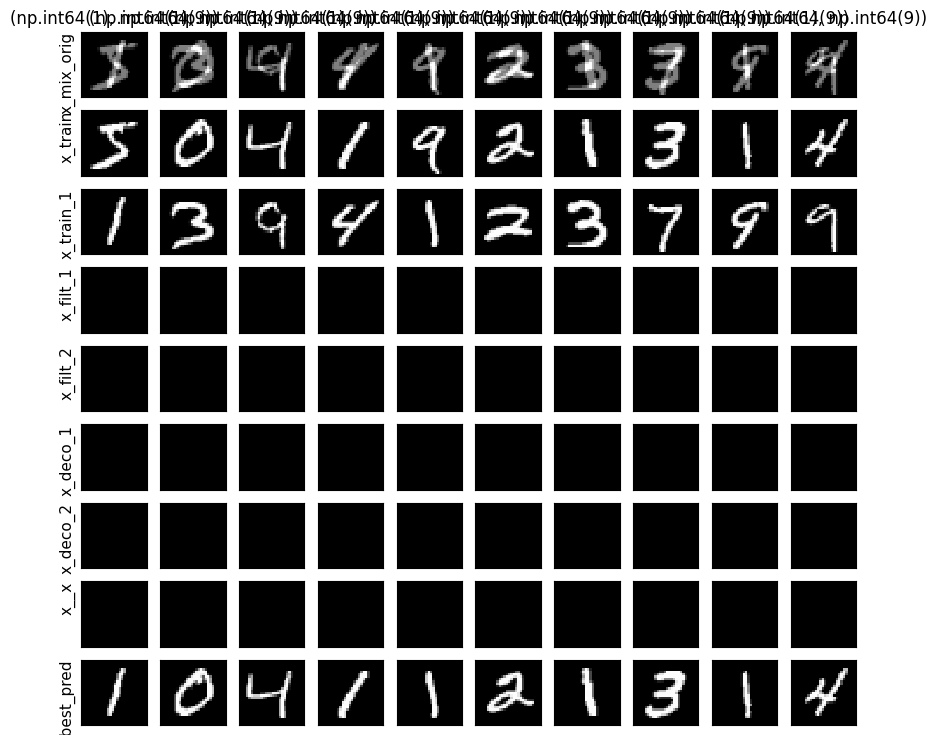

((<tf.Tensor: shape=(), dtype=float32, numpy=10.410834312438965>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.0963371992111206>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=10.410834312438965>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.0963371992111206>),
 array([[3.05529011e-06, 4.34716858e-05, 1.69040086e-05, 5.82360506e-01,
         6.62925892e-09, 2.45321855e-01, 6.52802896e-08, 7.14064081e-05,
         1.64607868e-01, 7.57476361e-03],
        [8.03021789e-01, 2.67571387e-09, 6.90727320e-04, 1.91894963e-01,
         1.17820642e-09, 1.34240363e-09, 1.92103585e-06, 1.05584911e-06,
         2.39753677e-03, 1.99193531e-03],
        [1.37193683e-13, 3.02093142e-08, 1.87374272e-09, 1.06801998e-08,
         9.41399872e-01, 7.25918076e-11, 1.68053085e-10, 8.59431282e-07,
         5.66100389e-05, 5.85426353e-02],
        [2.63233087e-05, 1.79002329e-03, 1.94524432e-06, 7.97488042e-07,
         9.05915141e-01, 9.79548602e-08, 7.96109589e-07, 3.07209630e-05,
         6.12492487e-02,

In [ ]:
print("Mejores hiperparámetros encontrados")


unmix(
    x_train[:10],
    x_train_1[:10],
    y_train[:10],
    y_train_1[:10],
    cvae,
    predictor,
    bias=study.best_params["bias"],
    slope=study.best_params["slope"],
    Iterations=10,
    show_graph=True,
)

Con los datos de MNIST no se obseva la sturación de las máscaras pro quelos digitos tiene menos "gris".


## Metricas de Accq para un digito y dos

Usando valores de 'bias': 0.22, 'slope': 22
Usando valores de 'bias': 0.2562, 'slope': 10.0067


In [7]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
import numpy as np
from keras.models import load_model

from custom_layers.Sampling import Sampling
from custom_layers.ReshapeLayer import ReshapeLayer

from data.get_data import get_mnist_data
from models_definitions.cvae import CVAE
from inference.inference import unmix


data = get_mnist_data("fashion")

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  

encoder = load_model(
    "../../trained_models/encoders_fashion/en_int_256_lat_128_fashion.keras",
    custom_objects={"Sampling": Sampling},
)

decoder = load_model(
    "../../trained_models/decoders_fashion/de_int_256_lat_128_fashion.keras"
)

cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)

predictor = load_model(
    "../../trained_models/predictores/CCE_Conv2D_fashion.keras",
    {"ReshapeLayer": ReshapeLayer},
)


def objective(trial):
    bias = trial.suggest_float("bias", 0.1, 0.5)
    slope = trial.suggest_float("slope", 5, 15)

    # print(f"Probando bias={bias}, slope={slope}")

    try:
        metrics = unmix(
            x_train[:1000],
            x_train_1[:1000],
            y_train[:1000],
            y_train_1[:1000],
            cvae,
            predictor,
            bias=bias,
            slope=slope,
            Iterations=3,
        )
        # print(f"Resultado OK: bpsnr = mean: {bpsnr[0]} std: {bpsnr[1]}\n")
        # print(f"Resultado OK: bpsnr = mean: {bpsnr_d[0]} std: {bpsnr_d[1]}\n")
        print(f"metricas {metrics["bpsnr"]}")
        return metrics["bpsnr"][0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        # Podés penalizarlorandom.seed(SEED) con un valor muy alto
        return float("inf")
    
print(cvae)
import optuna

# Creamos un estudio de minimización
SEED = 42

np.random.seed(SEED)

sampler = optuna.samplers.TPESampler(seed=SEED)

study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=50) 

# Mostramos los mejores resultados
print("\n📊 Mejores hiperparámetros encontrados:")
print(study.best_params)
print("🔽 Mejor bpsnr_mean:", study.best_value)


Usando fashion como dataset


[I 2025-08-16 18:51:16,806] A new study created in memory with name: no-name-39d8665e-c162-4de2-a6a6-c52c12c42a5c


<CVAE name=cvae_4, built=False>


[I 2025-08-16 18:51:20,203] Trial 0 finished with value: 15.404987335205078 and parameters: {'bias': 0.249816047538945, 'slope': 14.50714306409916}. Best is trial 0 with value: 15.404987335205078.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.404987335205078>, <tf.Tensor: shape=(), dtype=float32, numpy=2.451483964920044>)


[I 2025-08-16 18:51:23,130] Trial 1 finished with value: 15.111079216003418 and parameters: {'bias': 0.39279757672456206, 'slope': 10.986584841970366}. Best is trial 0 with value: 15.404987335205078.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.111079216003418>, <tf.Tensor: shape=(), dtype=float32, numpy=2.504398822784424>)


[I 2025-08-16 18:51:26,080] Trial 2 finished with value: 14.640665054321289 and parameters: {'bias': 0.1624074561769746, 'slope': 6.559945203362027}. Best is trial 0 with value: 15.404987335205078.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.640665054321289>, <tf.Tensor: shape=(), dtype=float32, numpy=1.6618666648864746>)


[W 2025-08-16 18:51:28,845] Trial 3 failed with parameters: {'bias': 0.12323344486727979, 'slope': 13.661761457749352} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_311537/109007130.py", line 51, in objective
    metrics = unmix(
              ^^^^^^
  File "/home/santi/Escritorio/tesis/CROP_1/inference/inference.py", line 100, in unmix
    ) = out.outcomes(
        ^^^^^^^^^^^^^
  File "/home/santi/Escritorio/tesis/CROP_1/inference/outcomes.py", line 31, in outcomes
    y_predicted = tf.math.argmax(predictor.predict(x, verbose=0), 1)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in e

KeyboardInterrupt: 

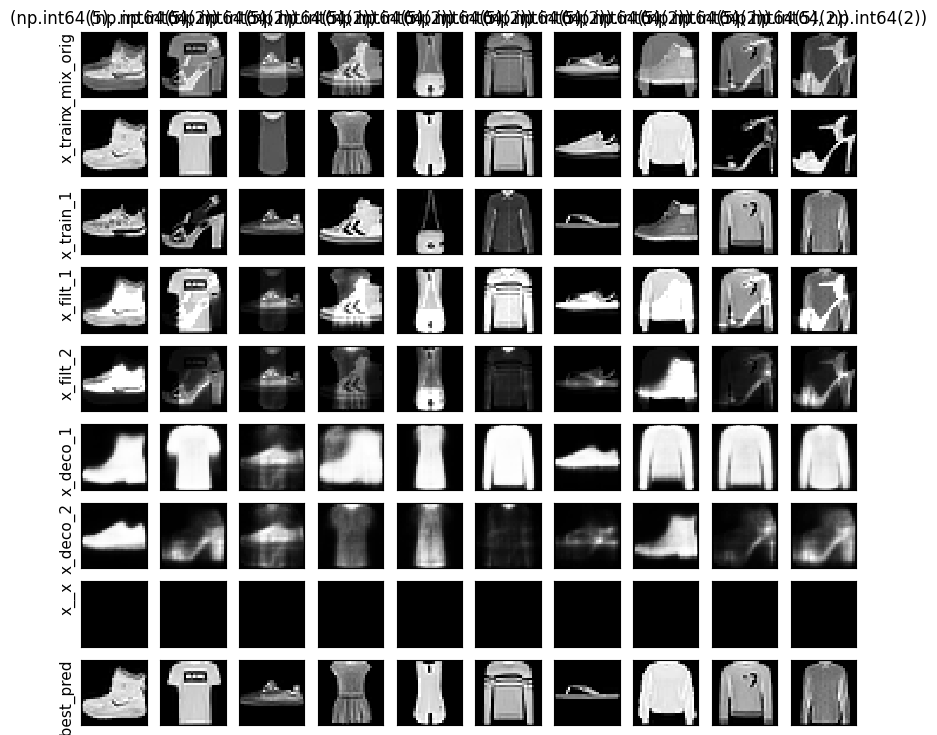

Accuracy al menos uno 0.7670000195503235
Accuracy ambos 0.17100000381469727


In [17]:
metrics = unmix(
    x_train[:1000],
    x_train_1[:1000],
    y_train[:1000],
    y_train_1[:1000],
    cvae,
    predictor,
    bias=study.best_params["bias"],
    slope=study.best_params["slope"],
    Iterations=5,
    show_graph=True,
)

print(f"Accuracy al menos uno {metrics["accuracy_at_least_one"]}")
print(f"Accuracy ambos {metrics["accuracy_both"]}")

In [29]:
def filtrar_imagenes_con_max255():
    """
    Filtra las imágenes de los datasets Fashion-MNIST y MNIST que contienen al menos un píxel con valor 255,
    y aquellas que no contienen ningún píxel con valor 255.
    
    Returns:
    - x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion: Arrays filtrados de Fashion-MNIST.
    - x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist: Arrays filtrados de MNIST.
    """
    from tensorflow.keras.datasets import fashion_mnist, mnist
    import numpy as np

    # Cargar Fashion-MNIST
    (x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

    # Filtrar imágenes de entrenamiento de Fashion-MNIST
    mask_train_fashion = np.any(x_train_fashion == 255, axis=(1, 2))
    x_train_fashion_con255 = x_train_fashion[mask_train_fashion]
    y_train_fashion_con255 = y_train_fashion[mask_train_fashion]
    x_train_fashion_sin255 = x_train_fashion[~mask_train_fashion]
    y_train_fashion_sin255 = y_train_fashion[~mask_train_fashion]

    # Filtrar imágenes de prueba de Fashion-MNIST
    mask_test_fashion = np.any(x_test_fashion == 255, axis=(1, 2))
    x_test_fashion_con255 = x_test_fashion[mask_test_fashion]
    y_test_fashion_con255 = y_test_fashion[mask_test_fashion]
    x_test_fashion_sin255 = x_test_fashion[~mask_test_fashion]
    y_test_fashion_sin255 = y_test_fashion[~mask_test_fashion]

    # Cargar MNIST
    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

    # Filtrar imágenes de entrenamiento de MNIST
    mask_train_mnist = np.any(x_train_mnist == 255, axis=(1, 2))
    x_train_mnist_con255 = x_train_mnist[mask_train_mnist]
    y_train_mnist_con255 = y_train_mnist[mask_train_mnist]
    x_train_mnist_sin255 = x_train_mnist[~mask_train_mnist]
    y_train_mnist_sin255 = y_train_mnist[~mask_train_mnist]

    # Filtrar imágenes de prueba de MNIST
    mask_test_mnist = np.any(x_test_mnist == 255, axis=(1, 2))
    x_test_mnist_con255 = x_test_mnist[mask_test_mnist]
    y_test_mnist_con255 = y_test_mnist[mask_test_mnist]
    x_test_mnist_sin255 = x_test_mnist[~mask_test_mnist]
    y_test_mnist_sin255 = y_test_mnist[~mask_test_mnist]

    return {
        'fashion_mnist': {
            'train_con255': (x_train_fashion_con255, y_train_fashion_con255),
            'train_sin255': (x_train_fashion_sin255, y_train_fashion_sin255),
            'test_con255': (x_test_fashion_con255, y_test_fashion_con255),
            'test_sin255': (x_test_fashion_sin255, y_test_fashion_sin255)
        },
        'mnist': {
            'train_con255': (x_train_mnist_con255, y_train_mnist_con255),
            'train_sin255': (x_train_mnist_sin255, y_train_mnist_sin255),
            'test_con255': (x_test_mnist_con255, y_test_mnist_con255),
            'test_sin255': (x_test_mnist_sin255, y_test_mnist_sin255)
        }
    }

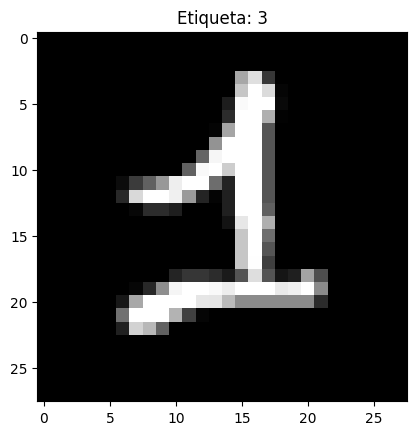

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist, mnist

# Cargar el conjunto de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtrar imágenes sin píxeles con valor 255
mask_train_sin255 = np.all(x_train != 255, axis=(1, 2))
x_train_sin255 = x_train[mask_train_sin255]
y_train_sin255 = y_train[mask_train_sin255]

# Verificar si hay imágenes sin píxeles con valor 255
if x_train_sin255.shape[0] > 0:
    # Mostrar la primera imagen sin píxeles con valor 255
    plt.imshow(x_train_sin255[1], cmap='gray')
    plt.title(f"Etiqueta: {y_train_sin255[0]}")
    plt.show()
else:
    print("No se encontraron imágenes sin píxeles con valor 255.")


print(x_train_sin255[0])

En ambos datasets hay imagenes sin 255. El problema de la imagen duplicada tiene que ver con el modelo, no con el dataset.

Evaluación de métricas

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
import numpy as np
from keras.models import load_model

from custom_layers.Sampling import Sampling
from custom_layers.ReshapeLayer import ReshapeLayer

from data.get_data import get_mnist_data
from models_definitions.cvae import CVAE
from inference.inference import unmix


data = get_mnist_data()

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  

encoder = load_model(
    "../../trained_models/encoders/en_int_256_lat_128_mnist.keras",
    custom_objects={"Sampling": Sampling},
)

decoder = load_model(
    "../../trained_models/decoders/de_int_256_lat_128_mnist.keras"
)

cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)

predictor = load_model(
    "../../trained_models/predictores/CCE_Conv2D.keras",
    {"ReshapeLayer": ReshapeLayer},
)






2025-08-15 00:09:38.735626: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-15 00:09:38.739031: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-15 00:09:38.752546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755227378.780650   20823 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755227378.787784   20823 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755227378.804445   20823 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando mnist como dataset


E0000 00:00:1755227381.482659   20823 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1755227381.483188   20823 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


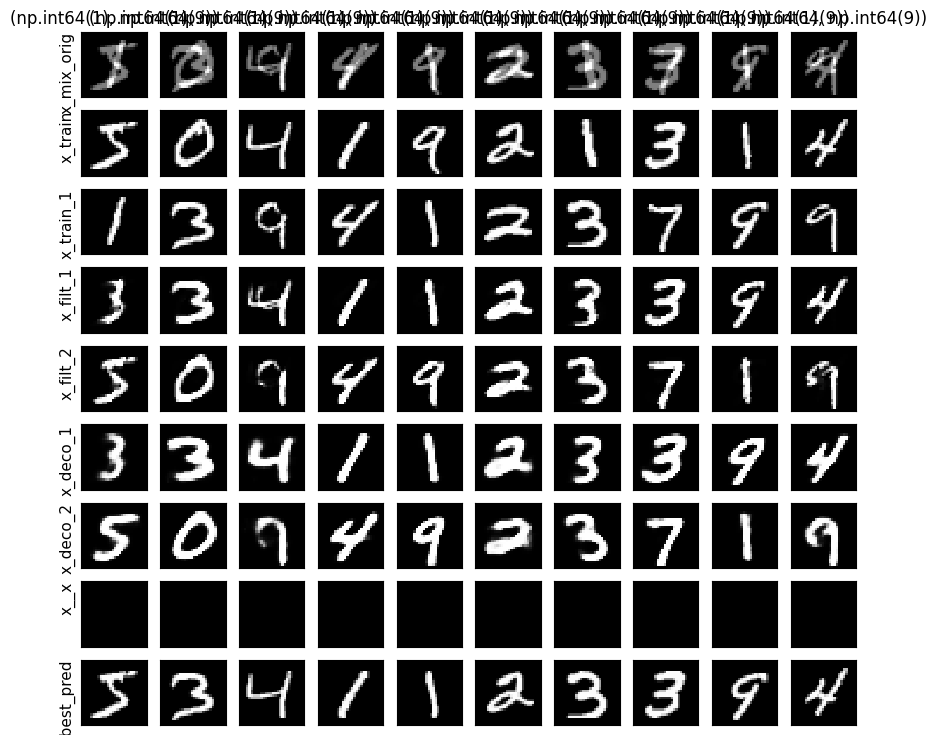

In [9]:

def accuracys(p1,p2,y1,y2):
    p1_max = np.argmax(p1, axis=1)
    p2_max = np.argmax(p2, axis=1)
    y1_max = np.argmax(y1, axis=1)
    y2_max = np.argmax(y2, axis=1)

    at_least_one = ((p1_max == y1_max) |
           (p1_max == y2_max) |
           (p2_max == y1_max) |
           (p2_max == y2_max)).astype(int)

    pred_pairs = np.sort(np.stack([p1_max, p2_max], axis=1), axis=1)
    y_pairs = np.sort(np.stack([y1_max, y2_max], axis=1), axis=1)

    # Comparamos fila a fila
    both = np.all(pred_pairs == y_pairs, axis=1).astype(int)

    acc_at_least_one = np.count_nonzero(at_least_one)/len(at_least_one)
    acc_both =  np.count_nonzero(both)/len(both)

    return acc_at_least_one, acc_both

In [ ]:
num_images=1000
metrics = unmix(
    x_train[:num_images],
    x_train_1[:num_images],
    y_train[:num_images],
    y_train_1[:num_images],
    cvae,
    predictor,
    Iterations=1,
)


metrics_op = unmix(
    x_train[:num_images],
    x_train_1[:num_images],
    y_train[:num_images],
    y_train_1[:num_images],
    cvae,
    predictor,
    bias=0.256,
    slope=10,
    Iterations=1,
)

predictions_1 = metrics["predictions_1"]
predictions_2 = metrics["predictions_2"]

predictions_1_op = metrics_op["predictions_1"]
predictions_2_op = metrics_op["predictions_2"]


acc_at_least_one, acc_both = accuracys( predictions_1, predictions_2, y_train[:num_images], y_train_1[:num_images])

acc_at_least_one_op, acc_both_op = accuracys( predictions_1_op, predictions_2_op, y_train[:num_images], y_train_1[:num_images])

print(f"al menos uno: default:  {acc_at_least_one} opt: {acc_at_least_one_op}  ")
print(f"ambos: default:  {acc_both} opt: {acc_both_op}  ")



al menos uno: default:  0.95 opt: 0.955  
ambos: default:  0.492 opt: 0.506  


Con los parametros optimizados parece haber una pequeña mejora de ambos digitos (sobre todo en bajas iteraciones.) En el caso de al menos un digito el resultado es practicamente el mismo. 
Con 1000 imagenes:
Al menos uno: default:  0.950 opt: 0.955  
Ambos:        default:  0.492 opt: 0.506 

In [10]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
import numpy as np
from keras.models import load_model

from custom_layers.Sampling import Sampling
from custom_layers.ReshapeLayer import ReshapeLayer

from data.get_data import get_mnist_data
from models_definitions.cvae import CVAE
from inference.inference import unmix


data = get_mnist_data("fashion")

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  

encoder = load_model(
    "../../trained_models/encoders_fashion/en_int_256_lat_128_fashion.keras",
    custom_objects={"Sampling": Sampling},
)

decoder = load_model(
    "../../trained_models/decoders_fashion/de_int_256_lat_128_fashion.keras"
)

cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)

predictor = load_model(
    "../../trained_models/predictores/CCE_Conv2D_fashion.keras",
    {"ReshapeLayer": ReshapeLayer},
)


def objective(trial):
    bias = trial.suggest_float("bias", 0.1, 0.5)
    slope = trial.suggest_float("slope", 5, 15)

    # print(f"Probando bias={bias}, slope={slope}")

    try:
        metrics = unmix(
            x_train[:1000],
            x_train_1[:1000],
            y_train[:1000],
            y_train_1[:1000],
            cvae,
            predictor,
            bias=bias,
            slope=slope,
            Iterations=3,
        )
        # print(f"Resultado OK: bpsnr = mean: {bpsnr[0]} std: {bpsnr[1]}\n")
        # print(f"Resultado OK: bpsnr = mean: {bpsnr_d[0]} std: {bpsnr_d[1]}\n")
        print(f"metricas {metrics["bpsnr"]}")
        return metrics["bpsnr"][0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        # Podés penalizarlorandom.seed(SEED) con un valor muy alto
        return float("inf")
    

import optuna

# Creamos un estudio de minimización
SEED = 42

np.random.seed(SEED)

sampler = optuna.samplers.TPESampler(seed=SEED)

study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=50) 

# Mostramos los mejores resultados
print("\n📊 Mejores hiperparámetros encontrados:")
print(study.best_params)
print("🔽 Mejor bpsnr_mean:", study.best_value)



Usando fashion como dataset


/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-08-15 13:39:28,389] A new study created in memory with name: no-name-25169250-cb12-4f2a-9a9c-c9c3514c3842
[I 2025-08-15 13:39:33,720] Trial 0 finished with value: 15.378253936767578 and parameters: {'bias': 0.249816047538945, 'slope': 14.50714306409916}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.378253936767578>, <tf.Tensor: shape=(), dtype=float32, numpy=2.459435224533081>)


[I 2025-08-15 13:39:37,993] Trial 1 finished with value: 15.1293306350708 and parameters: {'bias': 0.39279757672456206, 'slope': 10.986584841970366}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.1293306350708>, <tf.Tensor: shape=(), dtype=float32, numpy=2.466026782989502>)


[I 2025-08-15 13:39:41,790] Trial 2 finished with value: 14.636960983276367 and parameters: {'bias': 0.1624074561769746, 'slope': 6.559945203362027}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.636960983276367>, <tf.Tensor: shape=(), dtype=float32, numpy=1.6582427024841309>)


[I 2025-08-15 13:39:46,840] Trial 3 finished with value: 14.706441879272461 and parameters: {'bias': 0.12323344486727979, 'slope': 13.661761457749352}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.706441879272461>, <tf.Tensor: shape=(), dtype=float32, numpy=1.9609360694885254>)


[I 2025-08-15 13:39:51,403] Trial 4 finished with value: 15.356797218322754 and parameters: {'bias': 0.34044600469728353, 'slope': 12.080725777960454}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.356797218322754>, <tf.Tensor: shape=(), dtype=float32, numpy=2.49306583404541>)


[I 2025-08-15 13:39:55,586] Trial 5 finished with value: 14.511767387390137 and parameters: {'bias': 0.10823379771832098, 'slope': 14.699098521619943}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.511767387390137>, <tf.Tensor: shape=(), dtype=float32, numpy=1.9126437902450562>)


[I 2025-08-15 13:39:59,269] Trial 6 finished with value: 15.196325302124023 and parameters: {'bias': 0.4329770563201687, 'slope': 7.123391106782762}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.196325302124023>, <tf.Tensor: shape=(), dtype=float32, numpy=2.1636762619018555>)


[I 2025-08-15 13:40:02,998] Trial 7 finished with value: 14.809844970703125 and parameters: {'bias': 0.17272998688284025, 'slope': 6.834045098534338}. Best is trial 0 with value: 15.378253936767578.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.809844970703125>, <tf.Tensor: shape=(), dtype=float32, numpy=1.719869613647461>)


[I 2025-08-15 13:40:06,925] Trial 8 finished with value: 15.605380058288574 and parameters: {'bias': 0.2216968971838151, 'slope': 10.247564316322379}. Best is trial 8 with value: 15.605380058288574.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.605380058288574>, <tf.Tensor: shape=(), dtype=float32, numpy=2.212012529373169>)


[I 2025-08-15 13:40:10,405] Trial 9 finished with value: 15.79824447631836 and parameters: {'bias': 0.2727780074568463, 'slope': 7.912291401980419}. Best is trial 9 with value: 15.79824447631836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.79824447631836>, <tf.Tensor: shape=(), dtype=float32, numpy=2.090359687805176>)


[I 2025-08-15 13:40:14,328] Trial 10 finished with value: 15.835221290588379 and parameters: {'bias': 0.30862928160730635, 'slope': 8.60479386591526}. Best is trial 10 with value: 15.835221290588379.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.835221290588379>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2512547969818115>)


[I 2025-08-15 13:40:18,123] Trial 11 finished with value: 15.870107650756836 and parameters: {'bias': 0.307214865797806, 'slope': 8.468508914066216}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.870107650756836>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2197635173797607>)


[I 2025-08-15 13:40:21,646] Trial 12 finished with value: 15.752387046813965 and parameters: {'bias': 0.33927977917297436, 'slope': 8.722537178188734}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.752387046813965>, <tf.Tensor: shape=(), dtype=float32, numpy=2.337411403656006>)


[I 2025-08-15 13:40:25,597] Trial 13 finished with value: 15.182513236999512 and parameters: {'bias': 0.3192619352727868, 'slope': 5.27476591368354}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.182513236999512>, <tf.Tensor: shape=(), dtype=float32, numpy=1.811486840248108>)


[I 2025-08-15 13:40:29,282] Trial 14 finished with value: 14.64693546295166 and parameters: {'bias': 0.47878475055605973, 'slope': 8.846997258742357}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.64693546295166>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3311238288879395>)


[I 2025-08-15 13:40:32,974] Trial 15 finished with value: 15.396467208862305 and parameters: {'bias': 0.387352152856701, 'slope': 9.399492045282823}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.396467208862305>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3698837757110596>)


[I 2025-08-15 13:40:36,904] Trial 16 finished with value: 15.720902442932129 and parameters: {'bias': 0.2849378345686582, 'slope': 10.5999471830621}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.720902442932129>, <tf.Tensor: shape=(), dtype=float32, numpy=2.398282051086426>)


[I 2025-08-15 13:40:41,209] Trial 17 finished with value: 15.484060287475586 and parameters: {'bias': 0.21035717198172377, 'slope': 11.84227460625237}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.484060287475586>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2806999683380127>)


[I 2025-08-15 13:40:44,496] Trial 18 finished with value: 15.111652374267578 and parameters: {'bias': 0.37595616933987674, 'slope': 5.186322578047088}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.111652374267578>, <tf.Tensor: shape=(), dtype=float32, numpy=1.8681203126907349>)


[I 2025-08-15 13:40:47,652] Trial 19 finished with value: 14.945379257202148 and parameters: {'bias': 0.4545211179238096, 'slope': 8.35347622381684}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.945379257202148>, <tf.Tensor: shape=(), dtype=float32, numpy=2.278730630874634>)


[I 2025-08-15 13:40:50,804] Trial 20 finished with value: 15.77718734741211 and parameters: {'bias': 0.30515765319270177, 'slope': 9.57167048520283}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.77718734741211>, <tf.Tensor: shape=(), dtype=float32, numpy=2.351851463317871>)


[I 2025-08-15 13:40:54,013] Trial 21 finished with value: 15.79300594329834 and parameters: {'bias': 0.27783675018566484, 'slope': 7.744849732824809}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.79300594329834>, <tf.Tensor: shape=(), dtype=float32, numpy=2.075260877609253>)


[I 2025-08-15 13:40:57,149] Trial 22 finished with value: 15.606806755065918 and parameters: {'bias': 0.24306711189870875, 'slope': 7.6169257424565044}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.606806755065918>, <tf.Tensor: shape=(), dtype=float32, numpy=1.9762554168701172>)


[I 2025-08-15 13:41:00,265] Trial 23 finished with value: 15.368721961975098 and parameters: {'bias': 0.2727269150930853, 'slope': 6.101062379421838}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.368721961975098>, <tf.Tensor: shape=(), dtype=float32, numpy=1.8213050365447998>)


[I 2025-08-15 13:41:03,355] Trial 24 finished with value: 15.680414199829102 and parameters: {'bias': 0.3604063212686379, 'slope': 8.12801373916567}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.680414199829102>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2669858932495117>)


[I 2025-08-15 13:41:06,460] Trial 25 finished with value: 15.790294647216797 and parameters: {'bias': 0.3202197488924147, 'slope': 9.169246083275006}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.790294647216797>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3431050777435303>)


[I 2025-08-15 13:41:09,550] Trial 26 finished with value: 14.73404312133789 and parameters: {'bias': 0.18986930258728354, 'slope': 5.94225436584453}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.73404312133789>, <tf.Tensor: shape=(), dtype=float32, numpy=1.6654341220855713>)


[I 2025-08-15 13:41:12,648] Trial 27 finished with value: 14.772355079650879 and parameters: {'bias': 0.42153695896109433, 'slope': 11.446736852680855}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.772355079650879>, <tf.Tensor: shape=(), dtype=float32, numpy=2.5142295360565186>)


[I 2025-08-15 13:41:15,718] Trial 28 finished with value: 15.726079940795898 and parameters: {'bias': 0.2514585856058721, 'slope': 9.931071667545835}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.726079940795898>, <tf.Tensor: shape=(), dtype=float32, numpy=2.266141176223755>)


[I 2025-08-15 13:41:18,907] Trial 29 finished with value: 15.594247817993164 and parameters: {'bias': 0.2542121297476856, 'slope': 7.279142131508983}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.594247817993164>, <tf.Tensor: shape=(), dtype=float32, numpy=1.9734199047088623>)


[I 2025-08-15 13:41:21,968] Trial 30 finished with value: 15.861790657043457 and parameters: {'bias': 0.2950097317286571, 'slope': 8.036280572693858}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.861790657043457>, <tf.Tensor: shape=(), dtype=float32, numpy=2.152089834213257>)


[I 2025-08-15 13:41:25,108] Trial 31 finished with value: 15.846076965332031 and parameters: {'bias': 0.3008410278563061, 'slope': 8.643219435418342}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.846076965332031>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2511627674102783>)


[I 2025-08-15 13:41:28,232] Trial 32 finished with value: 15.738554954528809 and parameters: {'bias': 0.34533505449278074, 'slope': 8.473364062984732}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.738554954528809>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2850682735443115>)


[I 2025-08-15 13:41:31,401] Trial 33 finished with value: 15.753541946411133 and parameters: {'bias': 0.29864119316327986, 'slope': 10.078187028774542}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.753541946411133>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3693785667419434>)


[I 2025-08-15 13:41:34,466] Trial 34 finished with value: 15.760140419006348 and parameters: {'bias': 0.32602092286702716, 'slope': 9.082311386857846}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.760140419006348>, <tf.Tensor: shape=(), dtype=float32, numpy=2.317185878753662>)


[I 2025-08-15 13:41:37,616] Trial 35 finished with value: 15.366023063659668 and parameters: {'bias': 0.2985695713925653, 'slope': 13.629273218532528}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.366023063659668>, <tf.Tensor: shape=(), dtype=float32, numpy=2.500277042388916>)


[I 2025-08-15 13:41:40,779] Trial 36 finished with value: 15.535195350646973 and parameters: {'bias': 0.36821805704195465, 'slope': 6.329874151980674}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.535195350646973>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0145838260650635>)


[I 2025-08-15 13:41:43,949] Trial 37 finished with value: 15.364511489868164 and parameters: {'bias': 0.4162291773316622, 'slope': 7.438997332441302}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.364511489868164>, <tf.Tensor: shape=(), dtype=float32, numpy=2.214841365814209>)


[I 2025-08-15 13:41:51,691] Trial 38 finished with value: 15.267364501953125 and parameters: {'bias': 0.22387437842264069, 'slope': 6.7444649721600625}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.267364501953125>, <tf.Tensor: shape=(), dtype=float32, numpy=1.8210722208023071>)


[I 2025-08-15 13:41:55,106] Trial 39 finished with value: 14.903239250183105 and parameters: {'bias': 0.1417016993146534, 'slope': 10.737631739180566}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.903239250183105>, <tf.Tensor: shape=(), dtype=float32, numpy=1.9312376976013184>)


[I 2025-08-15 13:41:58,335] Trial 40 finished with value: 15.572595596313477 and parameters: {'bias': 0.3550836570832451, 'slope': 9.641696422193771}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.572595596313477>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3973734378814697>)


[I 2025-08-15 13:42:01,623] Trial 41 finished with value: 15.762359619140625 and parameters: {'bias': 0.2630221458447567, 'slope': 8.006601251742936}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.762359619140625>, <tf.Tensor: shape=(), dtype=float32, numpy=2.08150577545166>)


[I 2025-08-15 13:42:04,874] Trial 42 finished with value: 15.663546562194824 and parameters: {'bias': 0.23603434888143077, 'slope': 8.452546760291458}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.663546562194824>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0772972106933594>)


[I 2025-08-15 13:42:08,111] Trial 43 finished with value: 15.834527015686035 and parameters: {'bias': 0.28628404379613803, 'slope': 7.949832946216279}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.834527015686035>, <tf.Tensor: shape=(), dtype=float32, numpy=2.1317551136016846>)


[I 2025-08-15 13:42:11,272] Trial 44 finished with value: 15.717201232910156 and parameters: {'bias': 0.29230627065362746, 'slope': 7.014262376192413}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.717201232910156>, <tf.Tensor: shape=(), dtype=float32, numpy=1.9717276096343994>)


[I 2025-08-15 13:42:14,515] Trial 45 finished with value: 15.814276695251465 and parameters: {'bias': 0.315435391034853, 'slope': 8.836470198189463}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.814276695251465>, <tf.Tensor: shape=(), dtype=float32, numpy=2.298915386199951>)


[I 2025-08-15 13:42:17,672] Trial 46 finished with value: 15.774813652038574 and parameters: {'bias': 0.3320151166206679, 'slope': 7.908918422784239}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.774813652038574>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2248706817626953>)


[I 2025-08-15 13:42:20,901] Trial 47 finished with value: 15.41869068145752 and parameters: {'bias': 0.3955162164247908, 'slope': 8.567039697080709}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.41869068145752>, <tf.Tensor: shape=(), dtype=float32, numpy=2.315115451812744>)


[I 2025-08-15 13:42:24,064] Trial 48 finished with value: 15.441553115844727 and parameters: {'bias': 0.20133817334580828, 'slope': 9.050454419001763}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.441553115844727>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0615577697753906>)


[I 2025-08-15 13:42:27,370] Trial 49 finished with value: 15.786904335021973 and parameters: {'bias': 0.3075398811631066, 'slope': 7.291555862559635}. Best is trial 11 with value: 15.870107650756836.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.786904335021973>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0834147930145264>)

📊 Mejores hiperparámetros encontrados:
{'bias': 0.307214865797806, 'slope': 8.468508914066216}
🔽 Mejor bpsnr_mean: 15.870107650756836


In [12]:
num_images=1000
metrics = unmix(
    x_train[:num_images],
    x_train_1[:num_images],
    y_train[:num_images],
    y_train_1[:num_images],
    cvae,
    predictor,
    Iterations=1,
)


metrics_op = unmix(
    x_train[:num_images],
    x_train_1[:num_images],
    y_train[:num_images],
    y_train_1[:num_images],
    cvae,
    predictor,
    bias=0.307,
    slope=8,
    Iterations=1,
)

predictions_1 = metrics["predictions_1"]
predictions_2 = metrics["predictions_2"]

predictions_1_op = metrics_op["predictions_1"]
predictions_2_op = metrics_op["predictions_2"]


acc_at_least_one, acc_both = accuracys( predictions_1, predictions_2, y_train[:num_images], y_train_1[:num_images])

acc_at_least_one_op, acc_both_op = accuracys( predictions_1_op, predictions_2_op, y_train[:num_images], y_train_1[:num_images])

print(f"al menos uno: default:  {acc_at_least_one} opt: {acc_at_least_one_op}  ")
print(f"ambos: default:  {acc_both} opt: {acc_both_op}  ")


al menos uno: default:  0.945 opt: 0.921  
ambos: default:  0.516 opt: 0.422  
